In [7]:
%cd /content/15x6-sim
# or wherever you cloned it, e.g. /content/drive/MyDrive/Projects/15x6-sim
!pwd
!ls data/
!git clone https://github.com/MementoMori15x6/15x6-sim.git
%cd 15x6-sim
!pip install pandas numpy matplotlib seaborn scipy


[Errno 2] No such file or directory: '/content/15x6-sim'
/content
/content
ls: cannot access 'data/': No such file or directory
Cloning into '15x6-sim'...
remote: Enumerating objects: 667, done.
remote: Total 667 (delta 0), reused 0 (delta 0), pack-reused 667 (from 2)
Receiving objects: 100% (667/667), 348.36 KiB | 2.52 MiB/s, done.
Resolving deltas: 100% (386/386), done.
/content/15x6-sim


RC1 Calibration Locked – February 2026
- A = 1.5
- Veto threshold = -5.0 (1.5× severe / 0.8× mild)
- Run for USA/PRC or re-score your system

In [8]:
# RC1 Setup – Run once
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Navigate to repo (EDIT THIS PATH to match your Drive location)
%cd /content/drive/MyDrive/15x6-sim  # ← change if repo is elsewhere

!pwd
!ls data/  # should list your CSVs

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/15x6-sim # ← change if repo is elsewhere'
/content/15x6-sim
/content/15x6-sim
 35_metrics_ant_colony_baseline.csv
 35_metrics_placeholders.csv
'RC1_placeholder_35-metric_CSV_(USAPRC_calibration).md'


In [9]:
# Cell 1: Imports & config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve

# Config
import seaborn as sns
sns.set_style("whitegrid")             # or "darkgrid", "white", "ticks"
# sns.set_context("notebook", font_scale=1.2)  # optional: larger fonts
%matplotlib inline

# Cell 2: Load a system (change target to test different ones)
target_system = "USA_2020s"          # or "PRC_2020s", "Ants", etc.
df = pd.read_csv("data/35_metrics_placeholders.csv")

# Quick look
print(df.head())
print(f"\nColumns: {df.columns.tolist()}")

  Metric_ID   Category                                        Description  \
0        A1  Metabolic  Resource acquisition efficiency (GDP/productiv...   
1        A2  Metabolic                        Innovation/R&D output scale   
2        A3  Metabolic                     Energy density/conversion rate   
3        A4  Metabolic                   Raw material sourcing resilience   
4        A5  Metabolic             Labor force participation/adaptability   

   USA_2020s  PRC_2020s                                  Calibration_Notes  
0        8.8        9.4      IMF 2025 growth vs. Total Factor Productivity  
1        9.2        8.8             Patent filings vs. commercialized tech  
2        7.5        9.0  Renewable grid transition vs. manufacturing scale  
3        8.0        9.2   Supply chain diversity vs. state-led procurement  
4        8.5        9.5  Demographic productivity vs. workforce mobiliz...  

Columns: ['Metric_ID', 'Category', 'Description', 'USA_2020s', 'PRC_2020s'

In [10]:
import numpy as np
import pandas as pd

# Load data (adjust path if needed)
df = pd.read_csv("data/35_metrics_placeholders.csv")

# Select system
target = "USA_2020s"  # or "PRC_2020s"

# Extract scores
scores = df[target].astype(float).values

# Metabolic & Governance split
metabolic = scores[0:18]
governance = scores[18:35]

# Rule-13 subset (relative to governance)
rule13_rel_indices = np.array([0,1,2,3,4,5,8])
rule13_values = governance[rule13_rel_indices]

# Base & veto
Y_raw_base = np.mean(governance)
negative_rule13 = rule13_values[rule13_values < 0]
friction_drag = np.mean(negative_rule13) if len(negative_rule13) > 0 else 0.0

friction_threshold = -5.0
veto_multiplier = 1.5 if friction_drag < friction_threshold else 0.8

Y_raw = Y_raw_base - veto_multiplier * abs(friction_drag)

# Projection
A = 1.5
Y_projected = Y_raw * A
Y_clipped = np.clip(Y_projected, -1.0, 1.0)

X = np.clip(np.mean(metabolic) / 10.0, -1.0, 1.0)

# Parasitism %
rule13_norm = rule13_values / 10.0
negative_mask = rule13_norm < 0
parasitism_weighted = np.sum(-rule13_norm[negative_mask]) / len(rule13_norm)
parasitism_pct = parasitism_weighted * 100

# Zone logic
if Y_clipped >= 0.8:
    zone = "Prime Mutualism (Saturated Success)"
    longevity = "Centuries (high-trust baseline)"
elif 0.3 <= Y_clipped < 0.8:
    zone = "Stressed Mutualism"
    longevity = "Decades (drift zone)"
elif -0.29 < Y_clipped < 0.3:
    zone = "Separatrix"
    longevity = "Years (critical instability)"
elif -0.99 <= Y_clipped < -0.29:
    zone = "Active Competition"
    longevity = "Terminal (slow collapse)"
else:
    zone = "Boundary Saturation"
    longevity = "Imminent (kill switch active)"

# Print everything
print(f"--- RC1 Final Lock Diagnostic: {target} ---")
print(f"Metabolic Power (X): {X:.3f}")
print(f"Base Governance Avg: {Y_raw_base:.3f}")
print(f"Rule-13 Friction: {friction_drag:.3f}")
print(f"Veto Multiplier: {veto_multiplier:.1f}")
print(f"Veto-Adjusted Y_raw: {Y_raw:.3f}")
print(f"Projected Y: {Y_projected:.3f}")
print(f"Final Clipped Y: {Y_clipped:.3f}")
print(f"Master Grid Position: ({X:.3f}, {Y_clipped:.3f})")
print(f"Rule-13 Parasitism %: {parasitism_pct:.1f}%")
print(f"Longevity Zone: {zone}")
print(f"Estimated Longevity Window: {longevity}")
print(f"Bifurcation Proximity: {'High' if Y_clipped <= -0.8 else 'Low-Moderate'}")
print(f"Note: Projected Y outside [-1,1] indicates boundary saturation")

--- RC1 Final Lock Diagnostic: USA_2020s ---
Metabolic Power (X): 0.612
Base Governance Avg: 3.765
Rule-13 Friction: -3.500
Veto Multiplier: 0.8
Veto-Adjusted Y_raw: 0.965
Projected Y: 1.447
Final Clipped Y: 1.000
Master Grid Position: (0.612, 1.000)
Rule-13 Parasitism %: 5.0%
Longevity Zone: Prime Mutualism (Saturated Success)
Estimated Longevity Window: Centuries (high-trust baseline)
Bifurcation Proximity: Low-Moderate
Note: Projected Y outside [-1,1] indicates boundary saturation


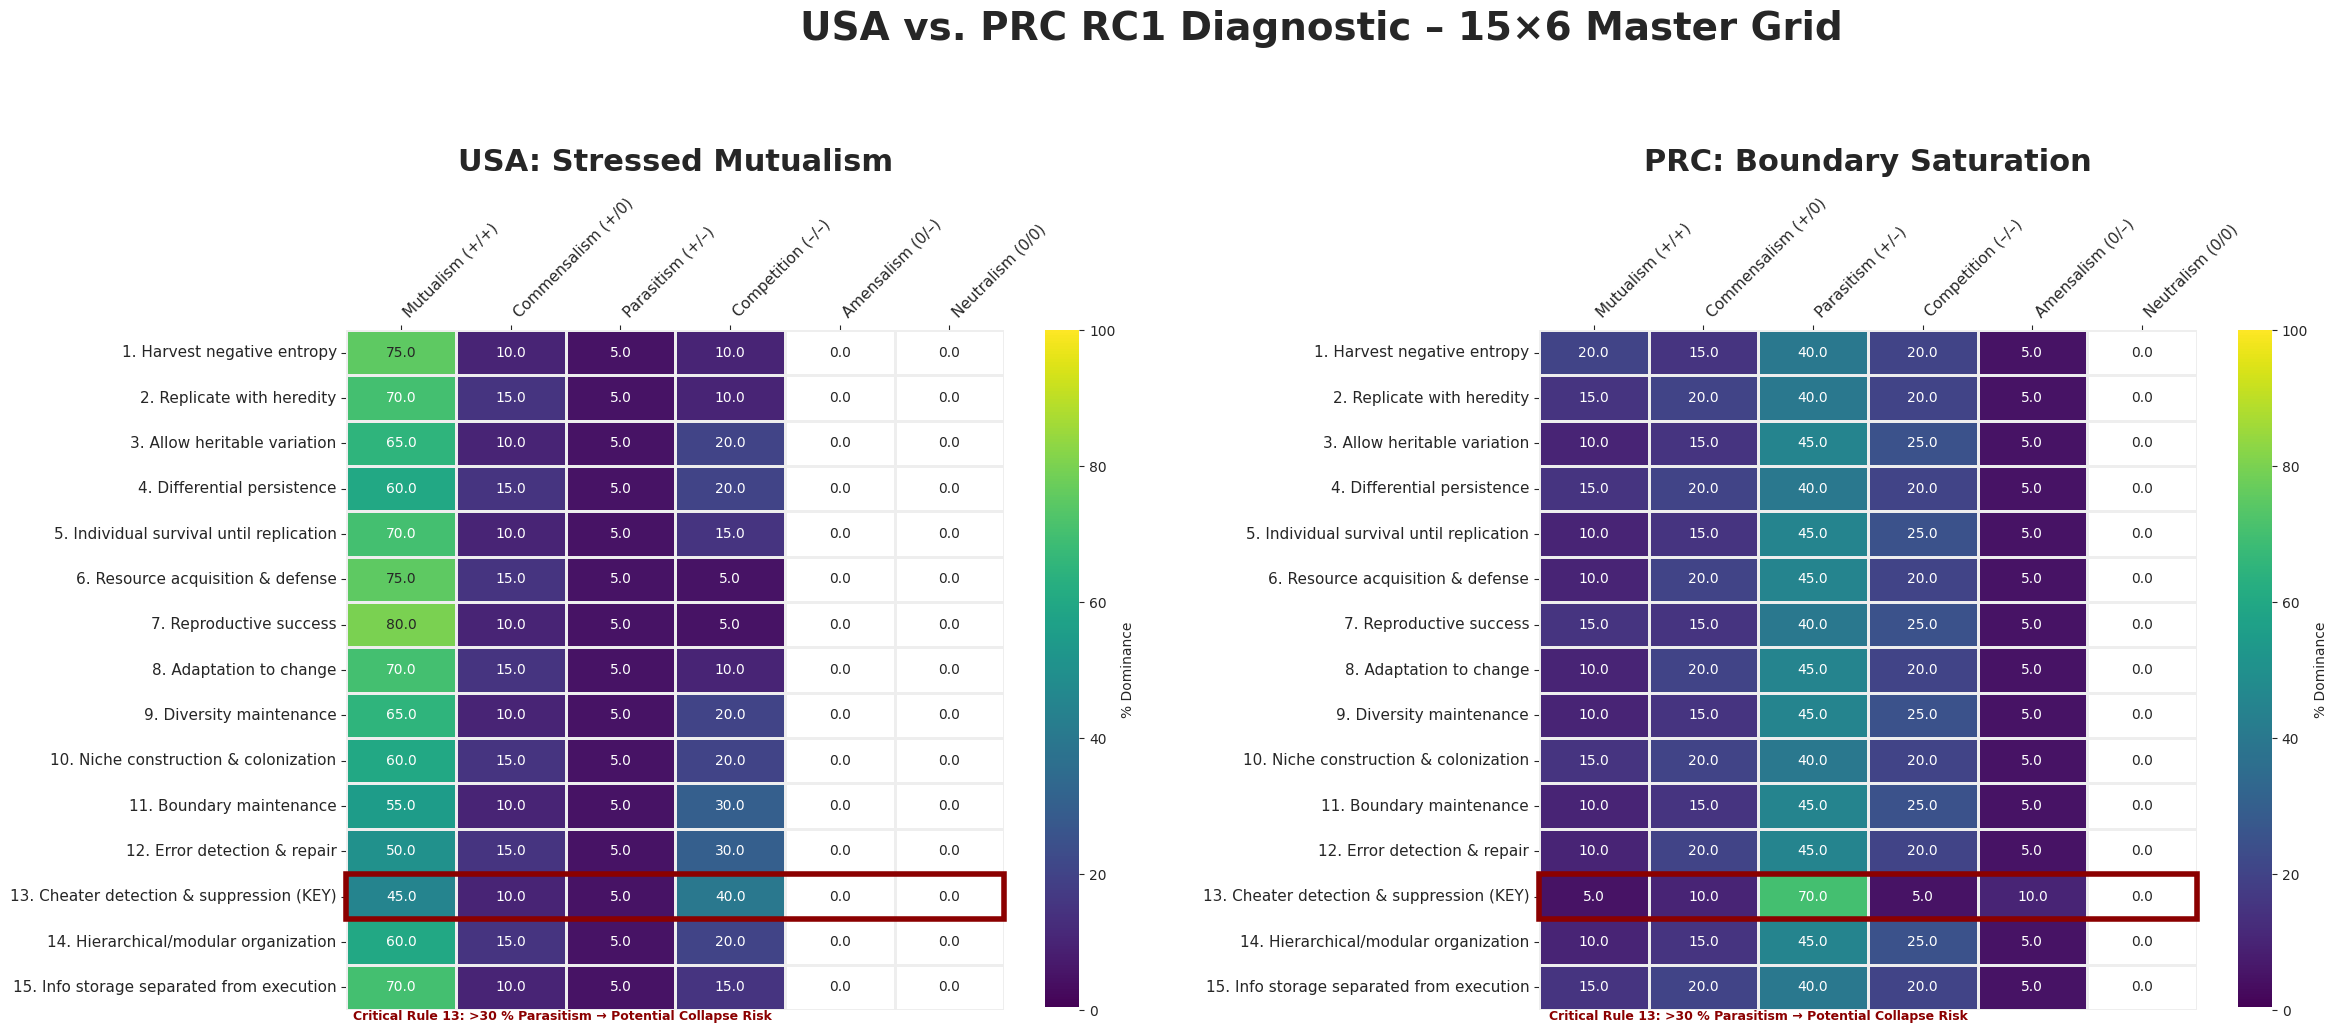

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# 1. THE CANON (Labels)
rules = [
    "1. Harvest negative entropy", "2. Replicate with heredity", "3. Allow heritable variation",
    "4. Differential persistence", "5. Individual survival until replication", "6. Resource acquisition & defense",
    "7. Reproductive success", "8. Adaptation to change", "9. Diversity maintenance",
    "10. Niche construction & colonization", "11. Boundary maintenance", "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY)", "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]

moves = [
    "Mutualism (+/+)", "Commensalism (+/0)", "Parasitism (+/–)",
    "Competition (–/–)", "Amensalism (0/–)", "Neutralism (0/0)"
]

# 2. DATA LOAD (Using DataFrames for automatic labeling)
# Note: This assumes usa_matrix and prc_matrix are already defined in your session
usa_df = pd.DataFrame(usa_matrix, index=rules, columns=moves)
prc_df = pd.DataFrame(prc_matrix, index=rules, columns=moves)

# 3. STYLING
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
newcolors[0, :] = [1, 1, 1, 1]
custom_map = LinearSegmentedColormap.from_list('WhiteViridis', newcolors)
oxford_red = "#8B0000"

# 4. PLOTTING - (26x10 is the 'No-Scroll' sweet spot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 10))

for ax, df, title_text in zip([ax1, ax2], [usa_df, prc_df], ["USA: Stressed Mutualism", "PRC: Boundary Saturation"]):
    # Render Heatmap
    sns.heatmap(df, annot=True, fmt=".1f", cmap=custom_map, vmin=0, vmax=100,
                linewidths=1, linecolor="#eeeeee",
                cbar_kws={'label': '% Dominance', 'pad': 0.05}, ax=ax)

    # Label Positioning (Moves on Top)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels(moves, rotation=45, ha="left", fontsize=11)
    ax.set_yticklabels(rules, rotation=0, fontsize=11)

    # --- SUBPLOT TITLES POSITIONING ---
    # 'pad=80' pushes the subtitle up away from the rotated move labels
    # 'y=1.15' is an alternative if pad isn't enough
    ax.set_title(title_text, fontsize=22, fontweight='bold', pad=90, y=1.05)

    # Rule 13 Highlight (Oxford Red)
    ax.add_patch(plt.Rectangle((0, 12), 6, 1, fill=False, edgecolor=oxford_red, lw=4, clip_on=False))

# After add_patch in the loop
ax.text(2, 15, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
        fontsize=9, color=oxford_red, ha='center', va='top', fontweight='bold')
ax.text(-8.9, 15, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
        fontsize=9, color=oxford_red, ha='center', va='top', fontweight='bold')

# 5. MAIN TITLE & FINAL SPACING
# y=0.98 pins the main title to the top without excessive head space
fig.suptitle("USA vs. PRC RC1 Diagnostic – 15×6 Master Grid",
             fontsize=28, fontweight='bold', y=1.12)

# Adjust 'top' to create a shelf for the sub-titles
plt.subplots_adjust(top=0.80, wspace=0.45, bottom=0.12)

# 6. SAVE & SHOW
plt.savefig("USA_vs_PRC_Final_Lock.png", dpi=300, bbox_inches="tight")
plt.show()